<a href="https://colab.research.google.com/github/gyurmey/tensorflow/blob/main/clothing-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt



In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images,train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

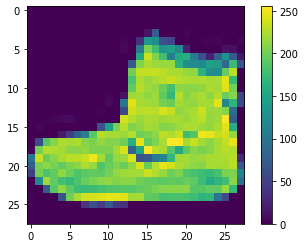

In [16]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [17]:
train_images = train_images / 255.0

test_images = test_images / 255.0

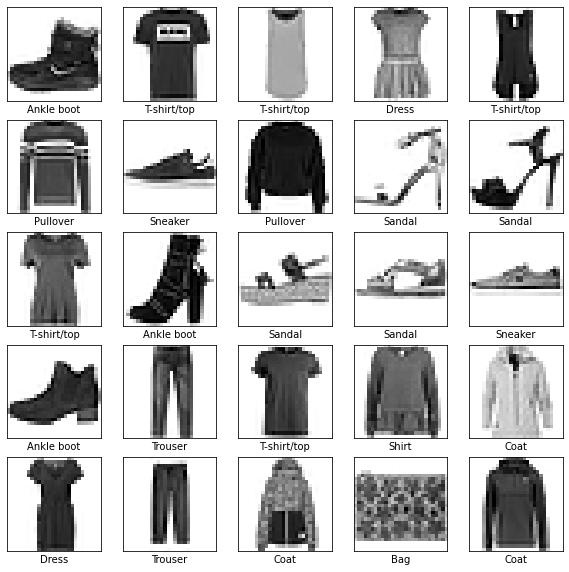

In [28]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [44]:
model.fit(train_images, train_labels, epochs=1)

1875/1875 [==============================] - 11s 6ms/step - loss: 0.0611 - accuracy: 0.9784


In [45]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\n Test accuracy:', test_acc)

313/313 - 1s - loss: 0.6884 - accuracy: 0.8858 - 817ms/epoch - 3ms/step

 Test accuracy: 0.8858000040054321


In [48]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [49]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [51]:
predictions[9]

array([6.1114267e-25, 2.9613854e-26, 0.0000000e+00, 8.5386886e-30,
       7.4478702e-35, 1.6399161e-13, 4.5836595e-25, 9.9999994e-01,
       4.0386443e-21, 7.8487257e-17], dtype=float32)

In [52]:
np.argmax(predictions[9])

7

In [54]:
test_labels[9]

7

In [55]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

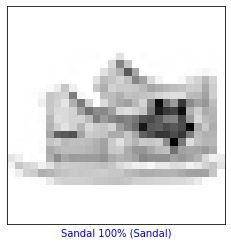

In [83]:
plot_image(9999, predictions[9999], test_labels, test_images)

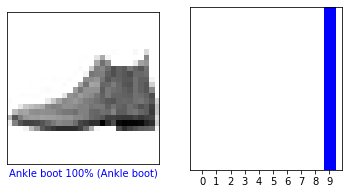

In [78]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

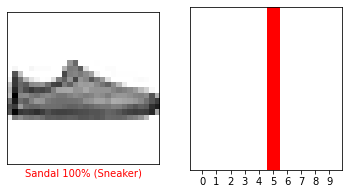

In [85]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

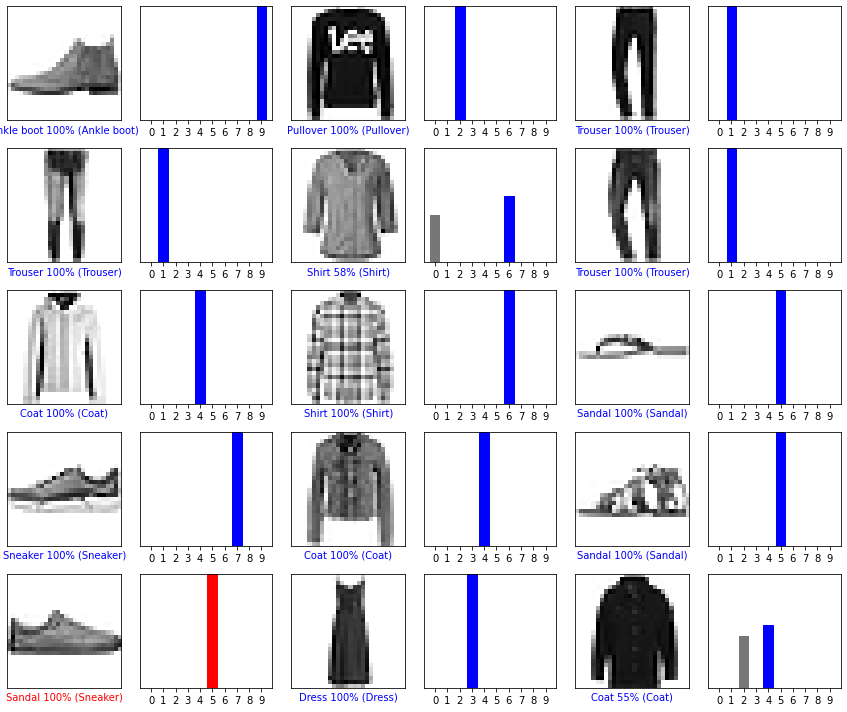

In [86]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [87]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [88]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [89]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 45ms/step
[[1.8597768e-04 3.2709541e-33 9.9971575e-01 1.4953112e-22 9.8271776e-05
  2.9660706e-19 1.1375158e-08 1.7106926e-36 1.0488133e-14 4.7428580e-35]]


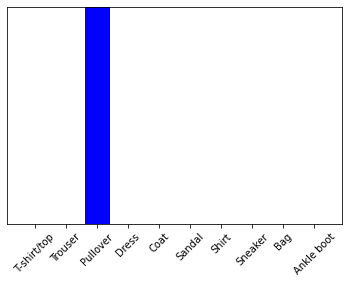

In [90]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [91]:
np.argmax(predictions_single[0])

2

In [94]:
test_labels[1]

2